Introduction¶
Here is my first project.

In this data, I classified wine qualities into 3 categories as good, mid and bad. Then, I explored the new data with data visualization libraries.

For prediction I used K-Nearest Neighbors, Support Vector Machine and Random Forest models.

For conclusion, I matched accuracy scores according to model prediction ratios

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('winequality-red.csv')

Saving winequality-red.csv to winequality-red.csv


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
#classify the quality into 3 categories

quality = df['quality'].values
category = []
for num in quality:
  if num < 5:
    category.append('Bad')
  elif num > 6:
    category.append('Good')
  else:
    category.append('Mid')


In [0]:
#create new dataframe called data

category = pd.DataFrame(data = category, columns=['category'])
data = pd.concat([df, category], axis= 1)
data.drop(columns = 'quality', axis = 1, inplace = True)

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

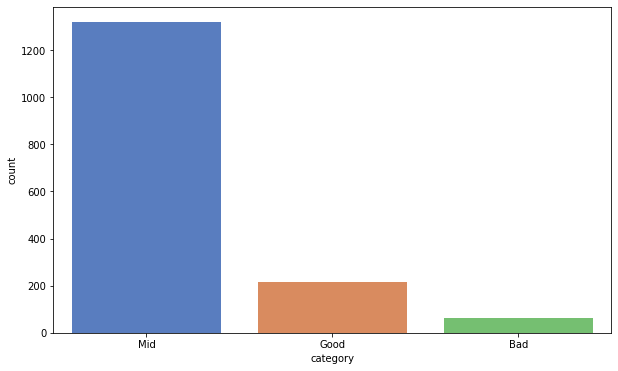

In [10]:
# correlation between class# and columns
plt.figure(figsize = (10,6))
sns.countplot(data['category'], palette='muted')
data['category'].value_counts()

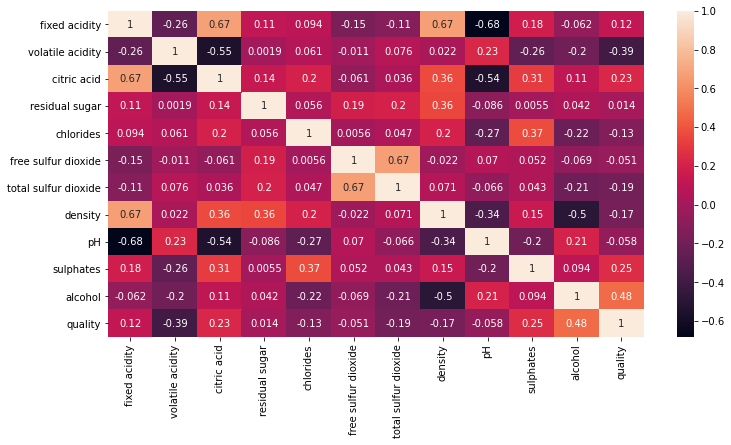

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

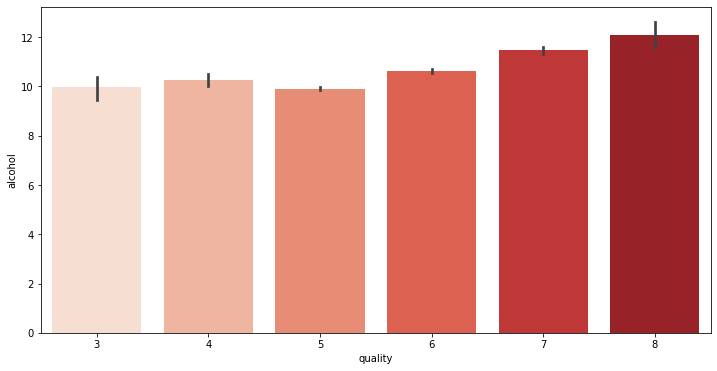

In [12]:
#According to heatmap, focus on alcohol-quality/density-alcohol relations
plt.figure(figsize=(12,6))
sns.barplot(x=df['quality'], y=df['alcohol'], palette='Reds')

<Figure size 864x432 with 0 Axes>

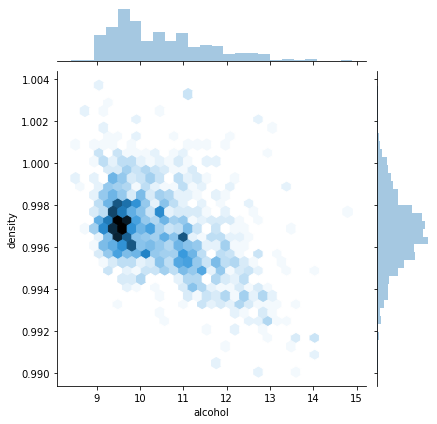

In [13]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df['density'], x=df['alcohol'], kind='hex')

In [14]:
data['category'].value_counts()

Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

In [0]:
#setting features, labels and encoding the categorical data
#(good=1, med=2, bad=3)

X = data.iloc[:, :-1].values
y= data.iloc[:, -1].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [0]:
#train/test data//顺序不能颠倒
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
#Scaling the data for optimise predictions
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
#train the model/predicting the test data(svm)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, pred_scv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      0.30      0.41        30
           2       0.89      0.98      0.93       277

    accuracy                           0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.65      0.57      0.61        30
           2       0.91      0.96      0.94       277

    accuracy                           0.89       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.85      0.89      0.87       320



In [32]:
#KNearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
conclusion = pd.DataFrame({'models': ['SVC', 'Randaom Forest', 'KNN'], 
                          'accuracies': [accuracy_score(y_test, pred_svc), accuracy_score(y_test, pred_rfc), 
                                         accuracy_score(y_test, pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.878125
1,Randaom Forest,0.887500
2,KNN,0.875000
